# **E-Commerce Customer Churn**

**By:** Fritz Immanuel - JCDS 2502

<hr>

# **Business Problem Understanding**

In today’s digital world, e-commerce has become a huge part of how businesses operate, making it easier than ever to reach customers anywhere. These businesses make money in different ways—through product sales, subscriptions, or even ads—but at the end of the day, none of that matters without customers. With competition fiercer than ever, keeping customers around is just as important as attracting new ones. If too many customers leave, or **churn**, companies start losing market share and revenue, forcing them to spend even more on marketing just to make up for the loss. That’s why understanding and preventing customer churn is key to staying ahead in such a competitive space.

### **Problem Statement**  

Every business strives to increase its market share, often through two primary strategies: acquiring new customers and retaining existing ones. While both are important, **customer retention is significantly more cost-effective than acquisition**. Keeping customers engaged requires addressing their concerns, offering personalized incentives like discount vouchers, and maintaining a high-quality experience. In contrast, acquiring new customers is challenging and expensive, often yielding a **low return on marketing investment**. Without an effective retention strategy, businesses risk spending heavily on attracting new customers while losing those they already have.  

The company has recently noticed a concerning trend—**customers are leaving**. They have given us a dataset of their members along with their characteristics and status. However, their current approach to churn detection is entirely **manual and reactive**. They only realize a customer has churned after they’ve already stopped being a member. The **lack of proactive intervention** makes it difficult to retain customers before they disappear, leaving the company with no choice but to launch both **costly re-engagement campaigns** and **incentives like discount vouchers** to win them back. This not only **increases financial strain** but also results in **avoidable revenue loss** and **losing market share**. Without a **predictive approach**, the company remains stuck in a **constant cycle of reacting** to churn rather than **preventing it**.

### **Goals**

The company needs a more proactive approach to identifying potential churn before it happens. Instead of relying on manual tracking, they aim to develop a system that can **accurately predict which customers are likely to leave**. This would allow them to focus retention efforts on the right customers, optimizing resource allocation and reducing unnecessary marketing costs. Additionally, the company wants to understand the **key factors that drive customer churn**. By identifying these patterns, they can refine their strategies to improve customer satisfaction and loyalty.

To achieve this, they would like to implement a Machine Learning model that utilizes historical and behavioral data to predict churn. With this predictive capability, the company can take the right actions to prevent customer loss and thus improve long-term growth.

### **Metrics Evaluation**

#### **False Positive**
When a customer is **predicted to churn**, but actually **not**. The loss is that we spent money to these customers on promotions to keep them, though they will stay anyway.

#### **False Negative**
When a customer is **predicted to stay**, but actually **not**. The loss is that we will lose a customer, thus losing sales.

Based on the consequences above, it is wise for us to create a model that avoids losing customers. This is because when giving promotions to staying customers, they will still produces sales. On the other hand, losing customers will even be less beneficial for our company. When customers churn, the company has to invest in marketing campaigns to win them back, which can be costly and resource-intensive. On top of that, the marketing campaigns may not attract these lost customers back, thus resulting in the loss of sales. Though attracting new customers is always a company priority, there should already be a budget set for this purpose. Pushing for more marketing campaigns to attract these lost customers will only result in more expenses. This means it is wise for the company to keep exisiting customers and preventing them from churning. Let's make a cost assumption for both these cases.

**Keeping Customers**: The company would like to spend approximately **$50** on promotions/discount vouchers per customer per month.<br>
**Lost Customers**: Potential losses by losing a customer is approximately **$150** from the loss of sales with an addition of $100 from marketing campaigns.

The company plans to have a **quarterly** review of this solution. Thus multiplying these numbers by 3. Here are the final cost assumptions:
- **Keeping Customers (FP)**: $\$50 \times 3 = \$150$
- **Lost Customers (FN)**: $(\$150 + \$100) \times 3 = \$750$

Since we have a higher loss from each FN, we need to focus on reducing the FN numbers. However, only focusing on FN means sacrificing the numbers from FP. To provide a more balanced result, we will be using **F2 Score** as a scoring method. 

<hr>

# **Loading Dataset**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipe

# Column Transformer
from sklearn.compose import ColumnTransformer

# Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Missing Values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Imbalance
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# modeling -> ensemble
# -> Various
from sklearn.ensemble import VotingClassifier, StackingClassifier
# -> Similar
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Confusion Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.metrics import make_scorer, fbeta_score

# SHAP
import shap

# Pickle
import pickle

#########################################

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # display all columns, without limits

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


<hr>

# **Data Understanding**

Dataset source: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

The dataset belongs to a leading online E-commerce company. The company wants to know the customers who are going to churn, so accordingly, they can approach customers to offer some promos.


| **Column Name**             |**Data Type** | **Description**                                              |**Insight**|
|---------------------------  |--------------|--------------------------------------------------------------|----------|
| **Tenure**                  | Float        | How long the customer has been a member of the platform. (months) |- Mean: 10<br>- Median: 9<br>- Mode: 1<br>|
| **WarehouseToHome**         | Float        | Distance between the warehouse to the customer’s home. (mi)  |- Mean: 15.6<br>- Median: 14<br>- Mode: 9<br>|
| **NumberOfDeviceRegistered**| Int          | Total number of devices registered on a particular customer. |- Mean: 4<br>- Median: 4<br>- Mode: 4<br>|
| **PreferedOrderCat**        | String       | Preferred order category of a customer in the last month.    |- `Fashion`<br>- `Grocery`<br>- `Laptop & Accessory`<br>- `Mobile`<br>- `Mobile Phone`<br>- `Others`|
| **SatisfactionScore**       | Int          | Satisfactory score of a customer on service.                 |1 (lowest) - 5 (highest)|
| **MaritalStatus**           | String       | Marital status of a customer.                                |- `Divorced`<br>- `Married`<br>- `Single`|
| **NumberOfAddress**         | Int          | Total number of addresses added for a particular customer.   |- Mean: 4<br>- Median: 3<br>- Mode: 2<br>|
| **Complaint**               | Int          | Any complaint raised in the last month.                      |`0` = No <br> `1` = Yes|
| **DaySinceLastOrder**       | Float        | Days since the last order by a customer.                     |- Mean: 5<br>- Median: 3<br>- Mode: 3<br>|
| **CashbackAmount**          | Float        | Average cashback in the last month.                          |- Mean: 177<br>- Median: 163<br>- Mode: 188<br>|
| **Churn**                   | Int          | Churn flag.                                                  |`0` = No <br> `1` = Yes|

In [3]:
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

In [4]:
(df['Churn'].value_counts() / len(df) * 100).round(2)

Churn
0    82.9
1    17.1
Name: count, dtype: float64

Our target is very imbalanced at 83:17. We will address this during the **Preparation** phase

### **Correlation to Target**

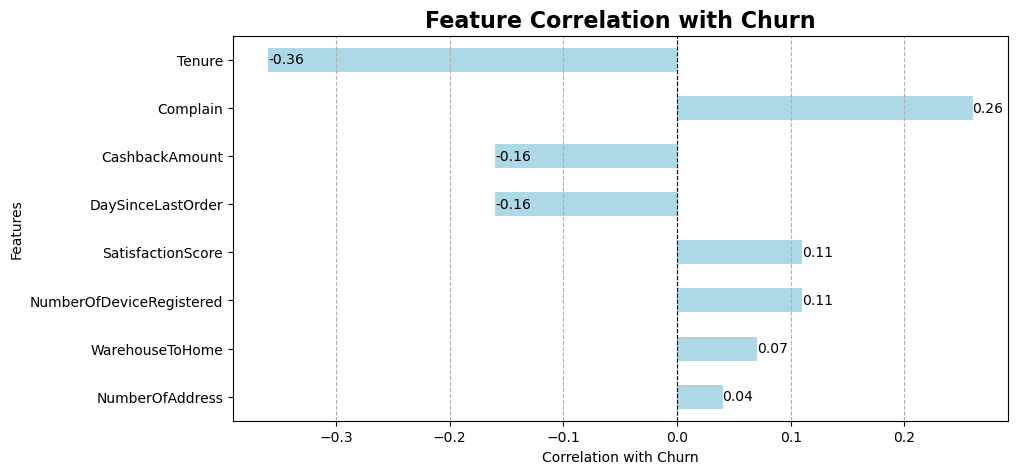

In [5]:
numerical_features = df.select_dtypes(include=np.number).columns

correlation = df[numerical_features].corr()['Churn'].drop('Churn').apply(lambda x: round(x, 2))
correlation = correlation.reindex(correlation.abs().sort_values().index)

plt.figure(figsize=(10, 5))
bars = correlation.plot(kind='barh', color='lightblue')
plt.xlabel('Correlation with Churn')
plt.ylabel('Features')
plt.title('Feature Correlation with Churn',
    fontdict={
      'fontsize': 16,
      'fontweight' : 'bold',
    })
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', linestyle='--')

for bar in bars.patches:
  plt.text(
    bar.get_width(),
    bar.get_y() + bar.get_height()/2,
    f'{bar.get_width():.2f}', va='center'
  )

plt.show()

When looking at the correlation between numerical features and the target (Churn), here are some key takeaways:
- **Long-tenured customers (-0.36)** are more likely to churn, requiring targeted retention efforts.
- **Complaints (0.26)** strongly correlate with churn—quick issue resolution is crucial.
- **Higher cashback (-0.16)** reduces churn, making it an effective retention tool.
- **Inactive customers (-0.16)** are at risk—re-engagement strategies are needed.
- **Delivery distance (0.07)** may impact churn, highlighting logistics improvements.

<hr>


# **Data Cleaning**

### **Duplicates**

In [6]:
df.duplicated().sum()

671

In [7]:
df = df.drop_duplicates()

We can see that we have **671** duplicates. To ensure accuracy of this model we will **remove** them.

### **Missing Values**

In [8]:
df.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

<Axes: >

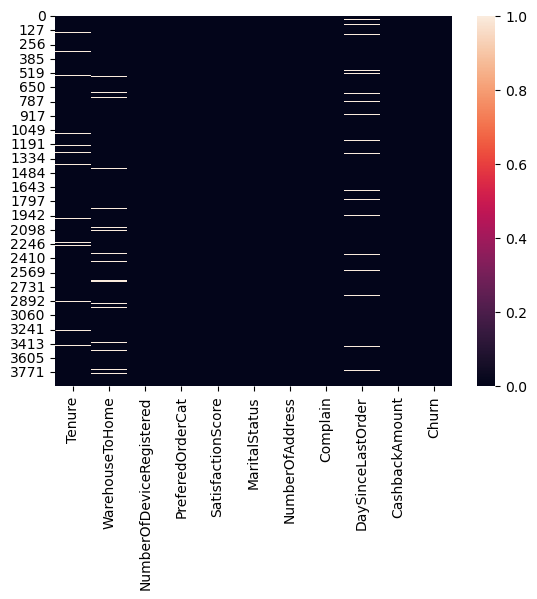

In [9]:
sns.heatmap(df.isna())

We can see that we have 3 columns that has `NaN` values. We will handle that during the **Preprocessing** phase.

### **Unique Data**

In [10]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].sort_values().unique()])

df_uniques_per_column = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
df_uniques_per_column[df_uniques_per_column['Number of Unique'] < 37].sort_values('Number of Unique', ascending=False)

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 50.0, 51.0, 60.0, 61.0, nan]"
1,WarehouseToHome,33,"[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 127.0, nan]"
8,DaySinceLastOrder,22,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 30.0, 31.0, 46.0, nan]"
6,NumberOfAddress,14,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 19, 21, 22]"
2,NumberOfDeviceRegistered,6,"[1, 2, 3, 4, 5, 6]"
3,PreferedOrderCat,6,"[Fashion, Grocery, Laptop & Accessory, Mobile, Mobile Phone, Others]"
4,SatisfactionScore,5,"[1, 2, 3, 4, 5]"
5,MaritalStatus,3,"[Divorced, Married, Single]"
7,Complain,2,"[0, 1]"
10,Churn,2,"[0, 1]"


We can see that there are 2 values that share a similar meaning which are the **Mobile** & **Mobile Phone** from the `PreferedOrderCat` column. We shall consolidate them to ensure model accuracy.

In [11]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].apply(lambda x: 'Mobile Phone' if x == 'Mobile' else x)

### **Outliers**

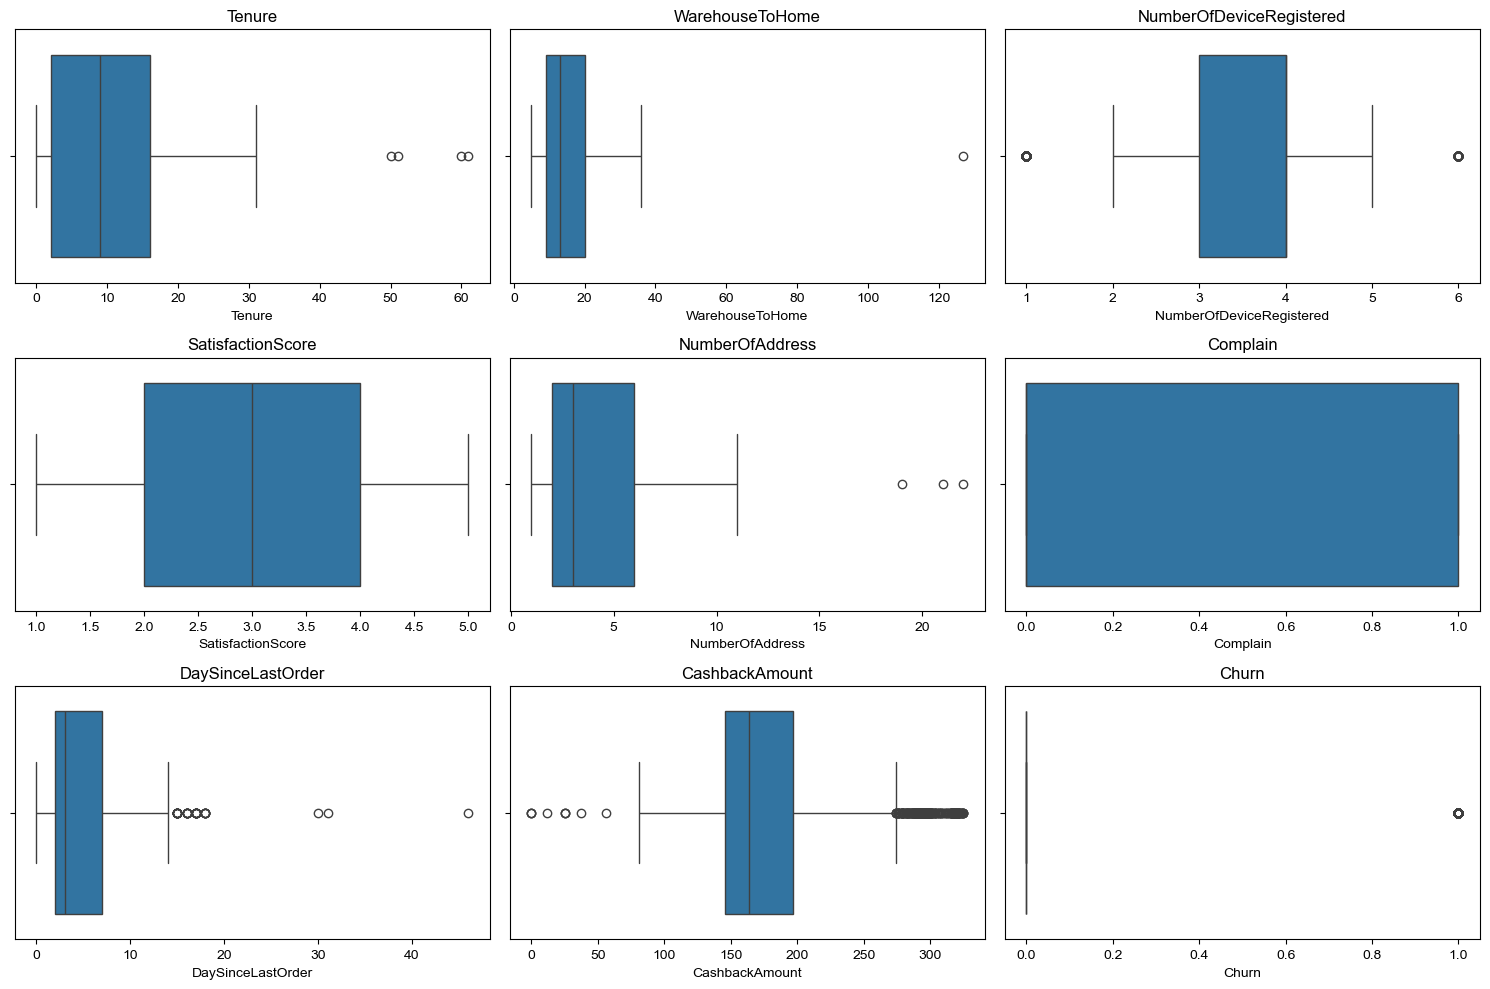

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.set_style('whitegrid')
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
  sns.boxplot(df, x=feature, ax=axes[i])
  axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

#### `Tenure`

In [13]:
df[df['Tenure'] > 40]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
51,61.0,28.0,4,Grocery,1,Married,6,1,1.0,303.75,0
449,51.0,7.0,2,Laptop & Accessory,3,Divorced,2,0,9.0,174.00,0
1209,60.0,27.0,3,Grocery,1,Married,5,1,0.0,278.75,0
3778,50.0,6.0,1,Laptop & Accessory,3,Divorced,1,0,8.0,149.00,0


<Axes: xlabel='Tenure', ylabel='Churn'>

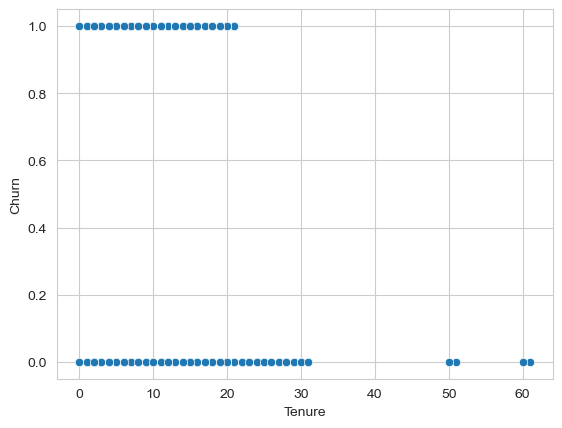

In [14]:
sns.scatterplot(df, x='Tenure', y='Churn')

We can see the `Tenure` has only 4 outliers. Since the amount of outliers are small we can remove them. 

In [15]:
df = df[df['Tenure'] < 40]

#### `WarehouseToHome`

In [16]:
df[df['WarehouseToHome'] > 120]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2717,26.0,127.0,4,Mobile Phone,1,Married,4,0,1.0,159.82,0


In [17]:
df = df[df['WarehouseToHome'] < 120]

We can see 1 extreme outlier here, where the customer is located 120km from the warehouse. This will skew our model as this can be classified as an extreme outlier, thus we will be removing this data.

#### `NumberOfAddress`

In [18]:
df[df['NumberOfAddress'] > 11]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0


In [19]:
df = df[df['NumberOfAddress'] <= 11]

We can see some customers actually has more than 11 number of addresses, which is rather intresting. But as this may skew our predictions, we will remove them.

#### `DaySinceLastOrder`

In [20]:
df[df['DaySinceLastOrder'] > 20]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
181,3.0,11.0,3,Mobile Phone,5,Married,6,0,30.0,132.04,0
3591,0.0,6.0,4,Fashion,3,Married,6,0,46.0,206.09,1
3830,4.0,12.0,4,Mobile Phone,5,Married,7,0,31.0,157.04,0


<Axes: xlabel='DaySinceLastOrder', ylabel='Churn'>

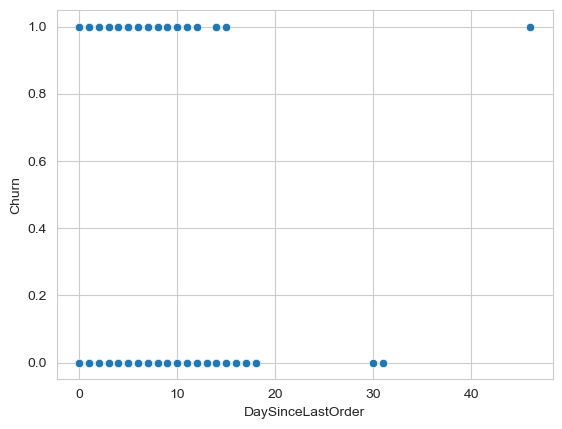

In [21]:
sns.scatterplot(df, x='DaySinceLastOrder', y='Churn')

In [22]:
df = df[df['DaySinceLastOrder'] < 20]

We can see that some customers has not made any order for more than 20 days. When we take a look at the data, we can see that this does not heavily influence churning, but they are still rather extreme outliers. We will remove them from the dataset.

### **Data After Cleaning**

In [23]:
df['Churn'].value_counts()

Churn
0    2374
1     410
Name: count, dtype: int64

In [24]:
df['Churn'].value_counts() / len(df)

Churn
0    0.85273
1    0.14727
Name: count, dtype: float64

### **Save Cleaned Data**

In [25]:
df.to_csv('data_ecommerce_customer_churn - CLEAN.csv')

<hr>

# **Data Preparation**

In this section we will be preparing the components needed for the development of a Machine Learning model. After separating feature(s) from target, we will have to split the dataset into 2, train & test. This crucial step allows us to better understand the performance of the Machine Learning model, as the test data will not be included when training the model. Allowing the test set into the training set will influence the results as the model already know the test set. You may think of it as already knowing the problems of a test.

The next step would be to *preprocess* the data. Machine Learning models only speak in numbers, it can't understand strings like us humans. To achieve this, here are some things we have to do:
- It is known that the dataset has missing values in some columns. These columns happen to contain discrete values, and to that we will be using **Simple Imputer** to handle the missing values. Using either *Iterative Imputer* or *KN Imputer* may result in continuous values which does not align with the nature of the feature.
- We have 2 categorical columns that contain string as their main value. To tackle this, we will be using **One Hot Encoder** to encode `MaritalStatus` and **Binary Encoder** to encode `PreferedOrderCat` as it has 5 values.
- Finally, when every data we have are already numbers (int / float), we have to scale them by using **Robust Scaler**. This is done in order to ensure that the data is resilient to outliers and maintains a consistent scale.

In [25]:
# X and y
X = df.drop(columns='Churn')
y = df['Churn']

In [26]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  stratify=y,
  test_size=0.2,
  random_state=0,
)

In [ ]:
pipe_simple_robust = Pipeline([
  ('simple', SimpleImputer(strategy='median', fill_value=int)),
  ('robust', RobustScaler()),
])

transformer = ColumnTransformer([
  ('pipe_simple_robust', pipe_simple_robust, ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']),
  ('onehot', OneHotEncoder(), ['MaritalStatus']),
  ('binary', BinaryEncoder(), ['PreferedOrderCat']),
  ('robust', RobustScaler(), ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount']),
], remainder='passthrough')

In [28]:
# sampling
ros = RandomOverSampler(random_state=0)
smote = SMOTE(sampling_strategy='minority')
rus = RandomUnderSampler(random_state=0)
nm = NearMiss(sampling_strategy='majority')

list_resamp = [ros, smote, rus, nm]

<hr>

# **Modeling**

We have now reached the modeling phase. In order to find the best model, we will be using an array of models, in which includes:
- Logistic Regression
- KNN
- Decision Tree
- Random Forest
- Voting
- Stacking
- ADA Boost
- Gradient Boosting
- XGB

Though there are still models left behind, these models should provide us with a good understanding of what ML models are capable of.

In [29]:
# model candidates
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
estimators = [
  ('logreg', logreg),
  ('knn', knn),
  ('tree', tree),
]

voting = VotingClassifier(estimators)
stacking = StackingClassifier(estimators)
adaboost = AdaBoostClassifier(random_state=0)
gradient = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier()

list_model = [logreg, knn, tree, rf, voting, stacking, adaboost, gradient, xgb]

In [30]:
f2_score = make_scorer(fbeta_score, beta=2)

### **a. Benchmark**

In [31]:
pd.set_option('display.max_colwidth', 30)

In [32]:
list_cv_score = []
list_mean_score = []
list_std_score = []

for model in list_model:
  pipe_cv = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model),
  ])

  cv_score = cross_val_score(
    estimator=pipe_cv,
    X=X_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    scoring=f2_score,
  )

  list_cv_score.append(cv_score.round(2))
  list_mean_score.append(cv_score.mean().round(4))
  list_std_score.append(cv_score.std().round(4))

pd.DataFrame({
  'model': list_model,
  'cv_score': list_cv_score,
  'mean_score': list_mean_score,
  'std_score': list_std_score,
}).sort_values('mean_score', ascending=False).head()

,model,cv_score,mean_score,std_score
8,XGBClassifier(base_score=N...,"[0.7, 0.68, 0.63, 0.75, 0.73]",0.6981,0.0416
2,DecisionTreeClassifier(ran...,"[0.7, 0.57, 0.58, 0.73, 0.64]",0.6450,0.0633
3,RandomForestClassifier(ran...,"[0.65, 0.61, 0.58, 0.73, 0...",0.6404,0.0497
7,GradientBoostingClassifier...,"[0.57, 0.61, 0.61, 0.67, 0...",0.6258,0.0420
6,AdaBoostClassifier(random_...,"[0.63, 0.57, 0.56, 0.65, 0.6]",0.6035,0.0359


We can see that **XGB Classifier** provides the highest average **F2 score**. For now, we will be using this for our base model.

In [33]:
pipe_bench = Pipeline([
  ('preprocessing', transformer),
  ('modeling', xgb),
])

model_bench = pipe_bench

model_bench.fit(X_train, y_train)

y_pred_bench = model_bench.predict(X_test)

print('Benchmark Test Score:', fbeta_score(y_test, y_pred_bench, beta=2))

Benchmark Test Score: 0.6582278481012658


### **b. Benchmark w/ Resampling**

To better enhance **F2 score**, we will be resampling the dataset to accommodate the imbalance. We will be using 4 resamplers, which are `RandomOverSampler()`, `SMOTE()`, `RandomUnderSampler()`, and `NearMiss()`,

In [34]:
list_resamp_cv_score = []
list_resamp_mean_score = []
list_resamp_std_score = []

df_result_bench = pd.DataFrame(columns=['model', 'resampler', 'cv_score', 'mean_score', 'std_score'])

for model in list_model:
  for resamp in list_resamp:
    pipe_cv = ImbPipe([
      ('preprocessing', transformer),
      ('resampling', resamp),
      ('modeling', model),
    ])

    cv_score = cross_val_score(
      estimator=pipe_cv,
      X=X_train,
      y=y_train,
      cv=5,
      n_jobs=-1,
      scoring=f2_score,
    )

    df_result_bench.loc[len(df_result_bench)] = [model, resamp, cv_score.round(2), cv_score.mean().round(4), cv_score.std().round(4)]

df_result_bench.sort_values('mean_score', ascending=False).head()

,model,resampler,cv_score,mean_score,std_score
28,GradientBoostingClassifier...,RandomOverSampler(random_s...,"[0.8, 0.76, 0.72, 0.77, 0.79]",0.7659,0.0274
34,XGBClassifier(base_score=N...,RandomUnderSampler(random_...,"[0.8, 0.74, 0.69, 0.78, 0.77]",0.7560,0.0378
14,RandomForestClassifier(ran...,RandomUnderSampler(random_...,"[0.78, 0.73, 0.69, 0.78, 0...",0.7532,0.0368
30,GradientBoostingClassifier...,RandomUnderSampler(random_...,"[0.75, 0.74, 0.72, 0.74, 0...",0.7391,0.0117
32,XGBClassifier(base_score=N...,RandomOverSampler(random_s...,"[0.71, 0.71, 0.7, 0.79, 0.74]",0.7310,0.0320


We found out that Resampling using a combination of **Gradient Boosing** and **ROS** provides the best average **F2 Score** of 0.7659. As this provides a higher score than our previous benchmark best (XGB), we will continue by using **Gradient Boosting**.

In [35]:
pipe_bench_sampling = ImbPipe([
  ('preprocessing', transformer),
  ('resampling', ros),
  ('modeling', gradient),
])

model_bench_sampling = pipe_bench_sampling

model_bench_sampling.fit(X_train, y_train)

y_pred_bench_sampling = model_bench_sampling.predict(X_test)

print('Benchmark w/ ROS Test Score:', fbeta_score(y_test, y_pred_bench_sampling, beta=2))

Benchmark w/ ROS Test Score: 0.6938325991189427


### **c. Confusion Matrix**

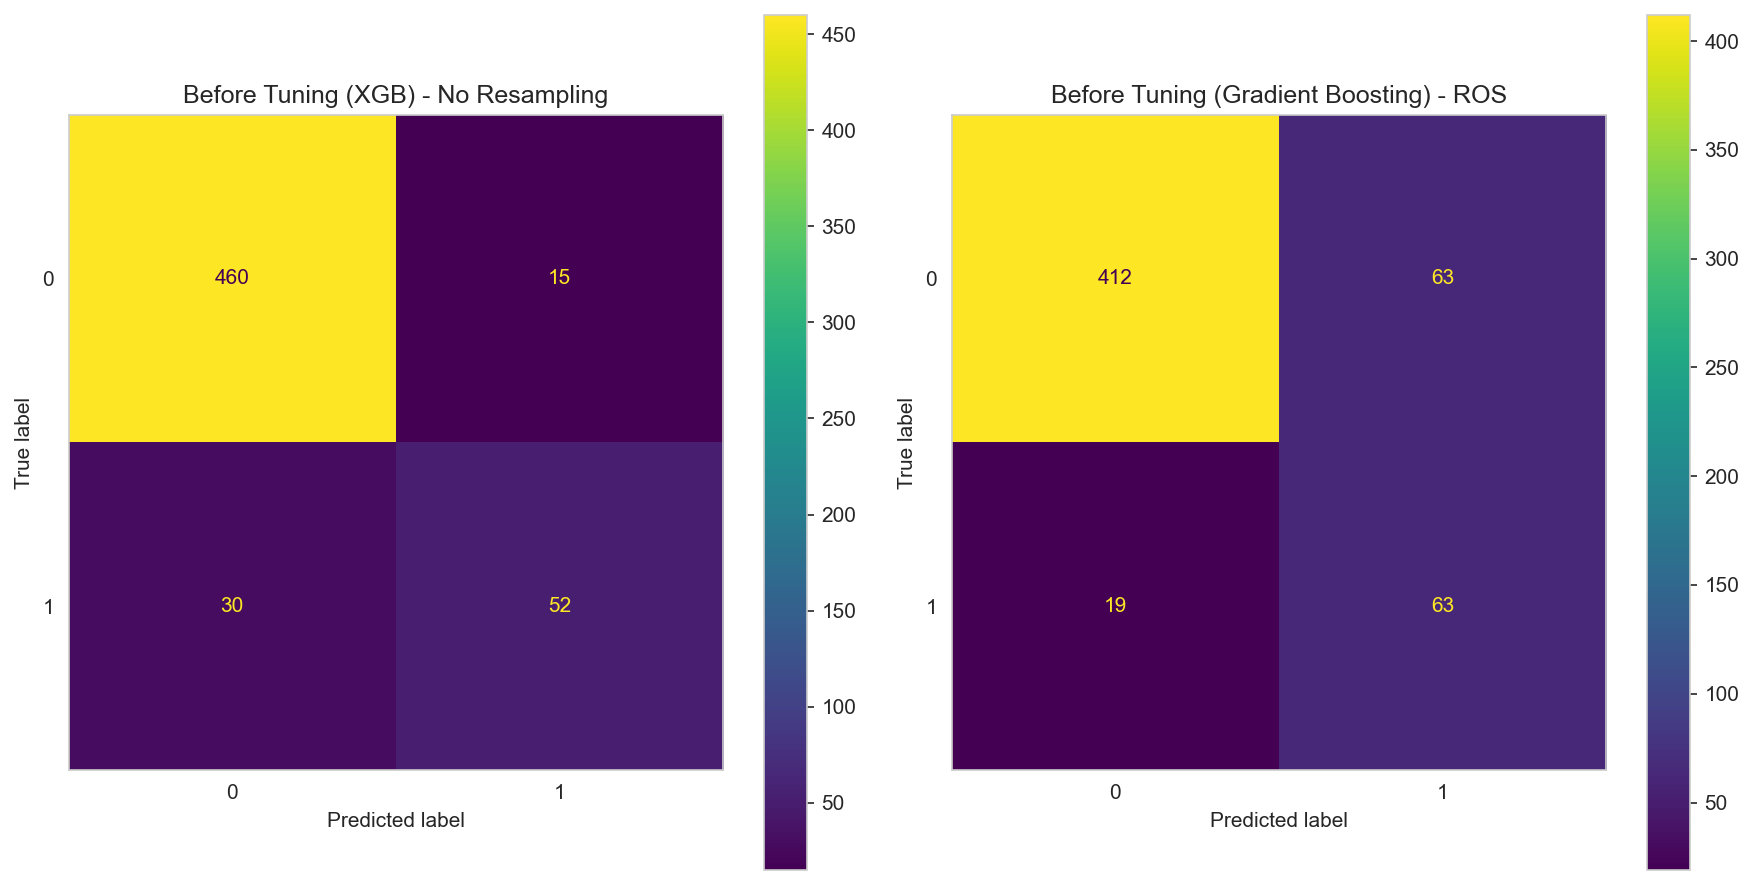

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

cm_bench = confusion_matrix(y_test, y_pred_bench)
cm_bench_sampling = confusion_matrix(y_test, y_pred_bench_sampling)

# Confusion matrix before resampling
disp_bench = ConfusionMatrixDisplay(confusion_matrix=cm_bench)
disp_bench.plot(ax=axes[0])
axes[0].set_title('Before Tuning (XGB) - No Resampling')
axes[0].grid(False)

# Confusion matrix after ROS resampling
disp_bench_sampling = ConfusionMatrixDisplay(confusion_matrix=cm_bench_sampling)
disp_bench_sampling.plot(ax=axes[1])
axes[1].set_title('Before Tuning (Gradient Boosting) - ROS')
axes[1].grid(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

After resampling, our Testing  **F2 score** goes up from **0.6582** to **0.6938**, which is a welcome improvement. With this combination, we can see that the **False Negative is reduced by 11 points**, though at the expense of **adding 48 points on the False Positive**. To get better results, let's tune the model.

<hr>

# **Tuning**

As we are moving forward by utlizing Gradient Boost, there are some parameters that we have to tune, which are:
|**Parameter**|**Data Type**|**Description**|
|----|----|----|
|**learning_rate**|float|Controls the step size of the optimization algorithm.<br>- **Higher**: Faster, but risk of overfitting.<br>- **Lower**: Slower, but better generalization.|
|**n_estimators**|int|The number of boosting rounds or trees in the model. Each tree builds upon the previous one to correct errors.<br>- **Higher**: more accurate, but slower.<br>- **Lower**: less accurate, but faster.|
|**max_depth**|int|The maximum depth of each individual tree. This controls how complex each tree can be.<br>- **Higher**: might overfit.<br>- **Lower**: might underfit.|
|**min_samples_leaf**|int|The minimum number of samples required to be at a leaf node.|
|**min_samples_split**|int|The minimum number of samples required to split an internal node.<br>- **Higher**: might reduce overfitting.<br>- **Lower**: might increase overfitting.|
|**subsample**|float|Controls the proportion of training data used for each tree.<br>- **Higher**: might overfit.<br>- **Lower**: might reduce overfitting.|

In [ ]:
pipe_prep_model = ImbPipe([
  ('transformer', transformer),
  ('resampling', ros),
  ('modeling', gradient),
])

pgrid = {
  'transformer__onehot': [OneHotEncoder(), BinaryEncoder()],
  'transformer__binary': [OneHotEncoder(), BinaryEncoder()],
  'resampling': [
    NearMiss(version=2),
    NearMiss(version=3, sampling_strategy=0.7),
  ],
  'modeling__n_estimators': [2200, 2300],
  'modeling__learning_rate': [0.00575, 0.0059, 0.0061],
  'modeling__max_depth': [8, 9],
  'modeling__min_samples_split': [4, 5, 6],
  'modeling__min_samples_leaf': [3, 4],
  'modeling__subsample': [0.74, 0.745, 0.75],
}

try:
  cv_result = pickle.load(open('best_cv_result.pkl', 'rb'))
except:
  cv_result = GridSearchCV(
    estimator=pipe_prep_model,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    param_grid=pgrid,
  )

  cv_result = RandomizedSearchCV(
    estimator=pipe_prep_model,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    param_distributions=pgrid,
    n_iter=100,
    random_state=0,
  )

  cv_result.fit(X_train, y_train)

In [38]:
tuned_model = cv_result.best_estimator_

tuned_model.fit(X_train, y_train)

y_pred_tuned = tuned_model.predict(X_test)

print('Best Params:', cv_result.best_params_)
print('Best Score:', round(cv_result.best_score_*100, 4))
print('Test Score:', round(fbeta_score(y_test, y_pred_tuned, beta=2)*100, 4))

Best Params: {'resampling': NearMiss(sampling_strategy=0.7, version=3), 'modeling__subsample': 0.745, 'modeling__n_estimators': 2200, 'modeling__min_samples_split': 4, 'modeling__min_samples_leaf': 3, 'modeling__max_depth': 9, 'modeling__learning_rate': 0.0061}
Best Score: 77.1521
Test Score: 75.6501


By using Grid Search Cross Validation to tune our model, we find that the best parameters for our `Gradient Booster` model is the following:

|**Parameter**| **Value** |
|---|---|
|`resampling`|Near Miss (learning_rate=0.7, version=3)|
|`learning_rate`|0.0061|
|`max_depth`|9|
|`min_samples_leaf`|3|
|`min_samples_split`|4|
|`n_estimators`|2200|
|`subsample`|0.745|

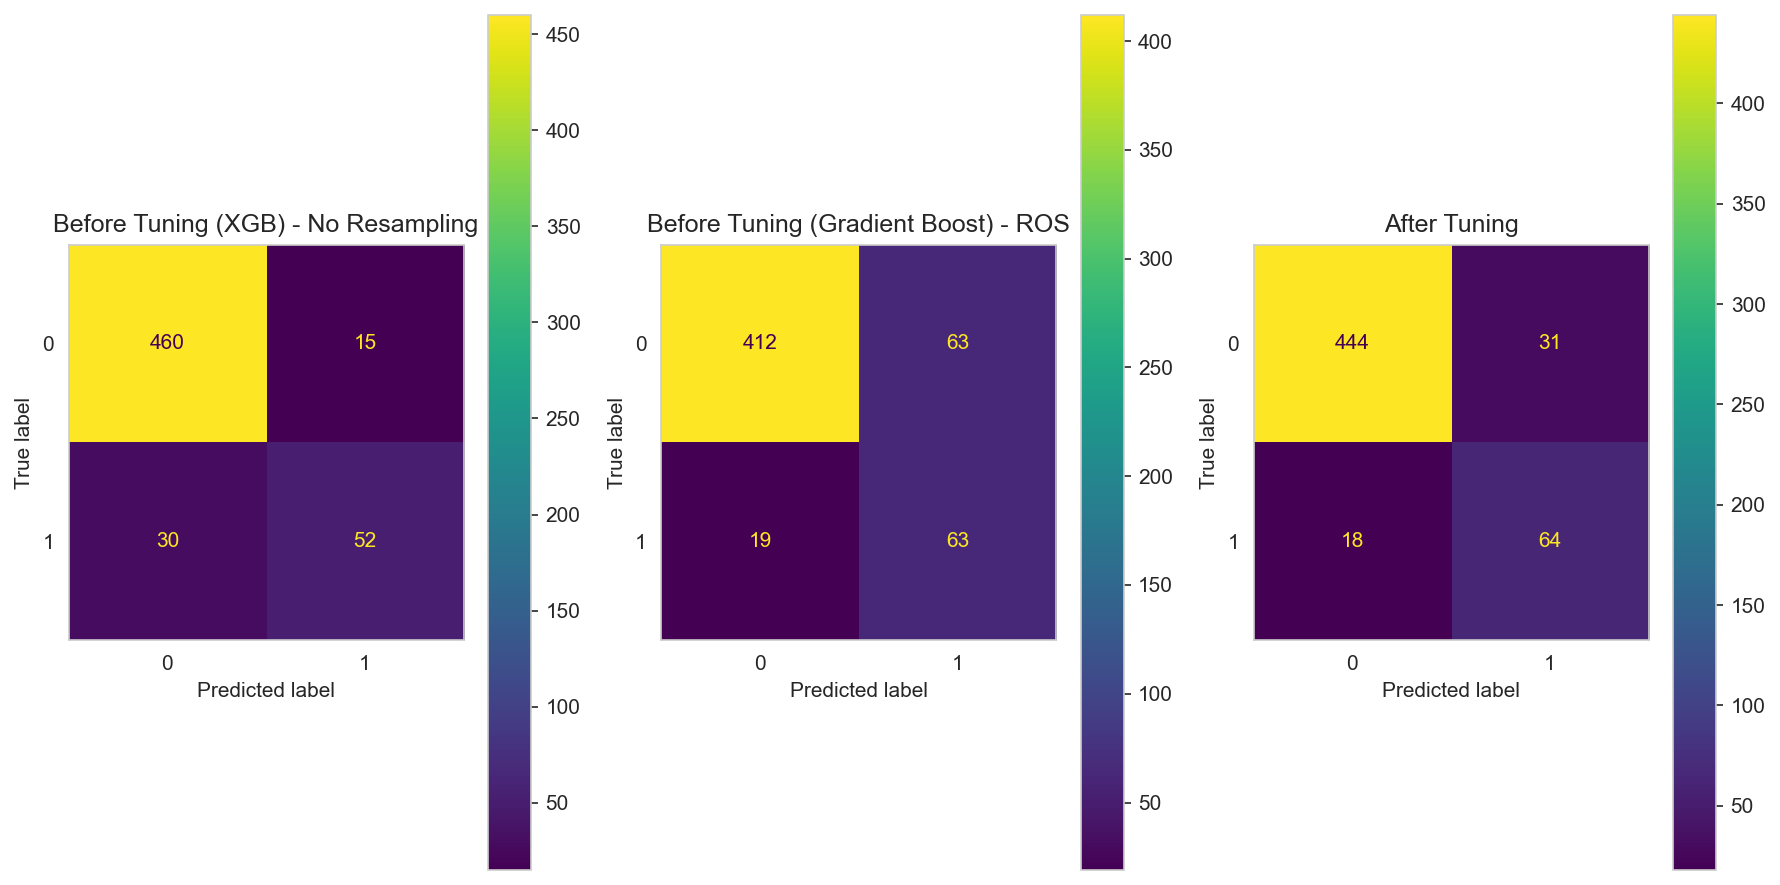

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), dpi=150)

cm_bench = confusion_matrix(y_test, y_pred_bench)
cm_bench_sampling = confusion_matrix(y_test, y_pred_bench_sampling)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

disp_bench = ConfusionMatrixDisplay(confusion_matrix=cm_bench)
disp_bench.plot(ax=axes[0])
axes[0].set_title('Before Tuning (XGB) - No Resampling')
axes[0].grid(False)

disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_bench_sampling)
disp_tuned.plot(ax=axes[1])
axes[1].set_title('Before Tuning (Gradient Boost) - ROS')
axes[1].grid(False)

disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned)
disp_tuned.plot(ax=axes[2])
axes[2].set_title('After Tuning')
axes[2].grid(False)

plt.tight_layout()
plt.show()

After tuning, we have successfuly reduced the numbers in the **False Positive** by **32 points**, and **False Negative** by **1 points**. We have already stated that FN produces a higher loss than FP, but by how much? Earlier we have stated a cost assumption of $150 for each False Positive and $750 for each False Negative. Let's see how the tuned model performs.

#### **Estimated Loss**
| **Model** | **FP** | **FN** | **Est. Loss** |
|----|----|----|----|
|**Before Tuning - No Resampling**| 15 | 30 | $24,750|
|**Before Tuning - ROS**| 63 | 19 | $23,700|
|**After Tuning**| 31 | 18 | $18,150|

After tuning our model further, we can see a significant decrease in estimated loss by $6,600 from the benchmark model and a $5,550 from the resampled benchmark model. Though we can see an increase in False Positive when comparing to our benchmark model. The numbers were quickly pulled down by the higher losses in False Negative, resulting in a lower total estimated loss.

In [40]:
FP = 31
FN = 18

(FP*150) + (FN*750)

18150

### **What is Gradient Boosting?**
Gradient Boosting is like a team of decision trees working together, each learning from the mistakes of the last. Instead of building one big model, it adds small improvements step by step, making it highly accurate and adaptable. However, if it keeps learning too much from the training data, it might become too specialized, losing its ability to perform well on new data. This is what we call ***overfitting***.

We now have our best score from using Gradient Boosting, but does it overfit? Let’s check and make sure it generalizes well.

In [41]:
print('Train Result:', round(cv_result.best_score_*100, 2))
print('Test Result:', round(fbeta_score(y_test, y_pred_tuned, beta=2)*100, 2))

Train Result: 77.15
Test Result: 75.65


The model shows no signs of overfitting based on its **train** and **test** results.

### **Saving the CV Result**

In [ ]:
# try:
  # pickle.dump(cv_result, open('best_cv_result.pkl', 'wb'))
# except:
#   pass

<hr>

# **Feature Importance**

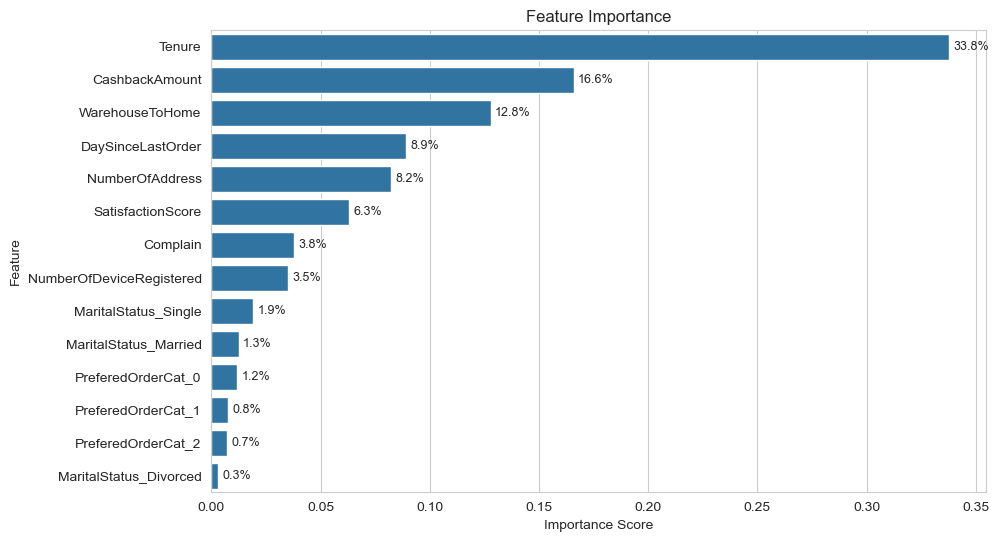

In [43]:
feature_names = [f.split('__')[-1] for f in list(tuned_model['transformer'].get_feature_names_out())]
# feature_names = tuned_model['transformer'].get_feature_names_out()

fimp_df = pd.DataFrame({
  'Feature Importance': tuned_model['modeling'].feature_importances_
}, index=feature_names).sort_values('Feature Importance', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=fimp_df, x='Feature Importance', y=fimp_df.index, orient='h')

for patch in ax.patches:
  width = patch.get_width()
  plt.text(
    x=width + 0.002,
    y=patch.get_y() + patch.get_height() / 2,
    s=f"{width * 100:.1f}%",
    ha='left', va='center',
    fontsize=9
  )

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.show()


The Feature Importance chart shows that **Tenure** is the strongest influence over customer churn, indicating that customer loyalty plays a key role. This is followed by **Cashback Amount**, suggesting that financial incentives impact behavior.  

Other notable factors include **WarehouseToHome**, **Complain**, and **DaySinceLastOrder**, reflecting engagement and service experience. **Satisfaction Score** also plays a role, reinforcing the impact of customer experience. Meanwhile, demographic factors like marital status and preferred order category have minimal influence.

The chart above only shows which features are most important for predicting customer churn. However, it is important to understand how these features influence predictions. This is where SHAP (SHapley Additive exPlanations) comes in. SHAP values provide deeper insights by showing the direction and the impact of each features on individual predictions.

<hr>

# **SHAP**

In [44]:
my_data_arr = tuned_model['transformer'].fit_transform(X_train)

explainer = shap.TreeExplainer(
  tuned_model['modeling'],
  data=my_data_arr,
  model_output='probability',
)

shap_values = explainer.shap_values(
  my_data_arr,
)

100%|===================| 2224/2227 [10:19<00:00]        

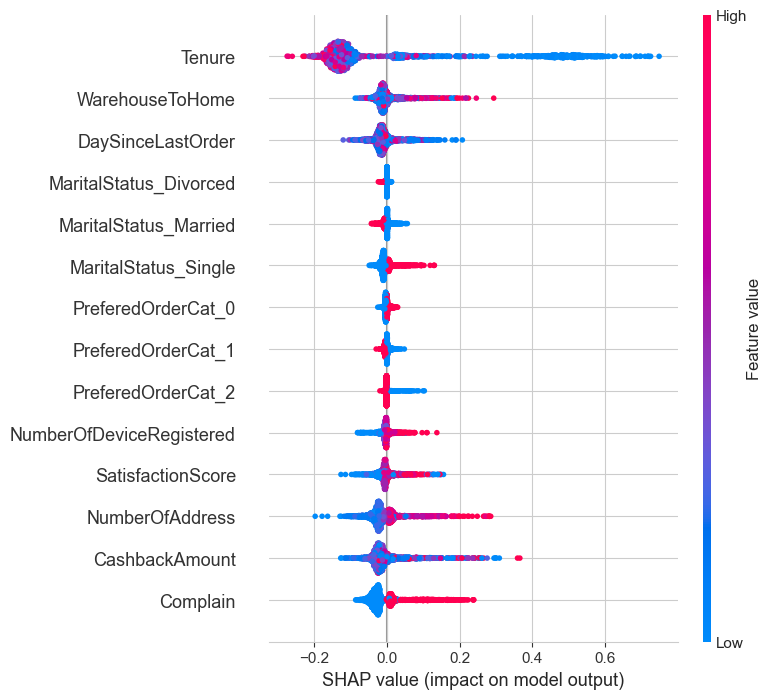

In [45]:
shap.summary_plot(
  shap_values,
  my_data_arr,
  feature_names=feature_names,
  sort=False,
)

### **SHAP Insights on Customer Churn**

#### **1. `Tenure`**
Longer tenure reduces churn, while new customers are more likely to leave. Strengthening early engagement could improve retention.

#### **2. `Complain`**
Customers who file complaints have a high churn risk. Addressing their concerns quickly can improve loyalty.

#### **3. `CashbackAmount`**
Surprisingly, high cashback recipients still churn. This suggests that cashback alone isn’t enough—perhaps service quality matters more.

#### **4. `NumberOfAddress`**
Customers with multiple addresses tend to stay, possibly indicating business users or frequent movers who rely on the service.

#### **5. `WarehouseToHome`**
Closer distance doesn't guarantee retention—perhaps local competitors or unmet delivery speed expectations play a role.

#### **6. `SatisfactionScore`**
Higher satisfaction leads to lower churn, reinforcing the importance of good customer experience.

#### **7. `MaritalStatus`**
- **Singles** stay longer, possibly due to individual purchasing habits.
- **Married** customers churn more, potentially due to budget constraints or household decision-making.
- **Divorced** customers show high churn, aligning with shifting financial priorities.

#### **8. `DaySinceLastOrder`**
Long gaps between orders indicate disengagement, making re-engagement strategies like promotions or reminders essential.

#### **9. `NumberOfDeviceRegistered`**
More registered devices suggest higher engagement, reducing churn risk. Those with fewer devices may not be as invested.

#### **10. `PreferedOrderCat`**
- **Tech products** (laptops, phones) show mixed churn, possibly due to infrequent but high-value purchases.
- **Daily-use items** (fashion, groceries) show lower churn, as they encourage regular repurchasing.

<hr>

# **Conclusion & Recommendation**

## **Conclusion**

In [46]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       475
           1       0.67      0.78      0.72        82

    accuracy                           0.91       557
   macro avg       0.82      0.86      0.84       557
weighted avg       0.92      0.91      0.91       557



Based on the classification report from our model, our model has achieved staggering 91% overall accuracy. However, we can observe some imbalance in the **precision** and **recall** for class 1.

**Class 0 (Non-Churners)**

The model achieves **96% precision** and **93% recall**, indicating a strong performance in identifying non-churners, though still with some misses.

**Class 1 (Churners)**

The model correctly identifies **78% of actual churners**, showing strong recall. However, with 67% precision, **one-third of predicted churners are actually non-churners**.

### **Financial Impact**

By implementing this model, the company has significantly reduced potential financial losses:

- **Without the model**, the estimated loss due to churn is **$102k per quarter**.

- **With the model**, the estimated loss due to misclassifications is only **$18k per quarter**, a **96% reduction** in losses.

Though we have successfuly reduced such a great number in losses, this model is not perfect.

### **When Can This Model Be Trusted?**

#### **Reliable Scenarios:**
- When identifying **customers who will not churn**, as the model has **96% precision** in correctly classifying them.
- When prioritizing **retention efforts**, since the model captures **78% of actual churners**, helping focus on those most at risk.

#### **Caution Required:**
- **False churn predictions:** **33% of predicted churners are actually non-churners**, which could lead to **unnecessary retention costs**.
- **Long-term deployment:** Customer behavior can shift over time, requiring **regular model updates to maintain accuracy**.

This model provides a powerful decision-making tool for reducing churn-related losses. However, due to the limitations of this model we should always ensure that missclassifications are dealt with correctly to avoid unnecessary costs. One of the limitations of this model is that it will only take the given features into account. New features may distrupt the model, and therefore updates to the model may be required.

### **Key Factors**

- **Tenure** – Newer customers are more likely to churn, possibly due to unmet expectations, lack of brand loyalty, or insufficient engagement.
- **Cashback Received** – Higher cashback is linked to higher churn, suggesting that customers who receive more cashback may be exploiting promotions or are less loyal.
- **Proximity to Warehouse** – Customers closer to the warehouse churn more, possibly due to unmet delivery expectations.
- **Customer Complaints** – Complaints increase churn risk, highlighting the need for quick and effective resolution.

Overall, this model provides a powerful tool for reducing churn-related losses, but it is important to keep in mind that it is not perfect and should be used with caution. It is important to continuously monitor and update the model to ensure that it remains accurate and effective.

## **Recommendation**

Here are some things that might further improve both the project & the results:

#### **Business**
- **Addressing Complaints**: Customers who has filed a complaint are more likely to churn. This might suggest that we are not addressing these complaints properly, thus resulting in customers leaving the platform.
- **Understanding Customers Needs**: Our newer customers are more likely to churn. This might indicate that these customers might not find what they need or unsatisfied by our services. More analysis is needed.
- **Delivery Improvements**: Customers who are located closer to the warehouse are more likely to churn. While we do not have enough data to point at the exact mistake, we can assume that these customers are probably are not satisfied with the delivery time.

#### **Features**
We are provided with 10 features in the dataset. But upon closer investigation, these features may not align very well with what we are trying to find out. To better improve our model and understanding, it is wise to include more features such as:
- **Customer Behaviour**: `Avg Order Value`, `Purchase Frequency`
- **Session Data**: `Time Spent in Platform`, `Pages Visited`
- **Referral & Loyalty**: `Customer Loyalty Program`
- **Competitor Analysis**: `Avg Order Value in Competitor Price`

#### **Model Optimization**
Though we achieved a rather staggering results using our current model, here are some things we can improve:
- **Advanced Hyperparameter Tuning**: Fine tuning our model using the more powerful `GridSearchCV()` with a more extensive parameter grid.
- **Models**: Using every model available in the arsenal to leave no stones unturned. svm, ann,
- **Scoring Method**: Though our problem calls for the need of F2-Score, it wouldn't hurt to furhter experiment with other scoring methods.